# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yayan Kurniawan
- **Email:** yayankurniawan.ti@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/yayankurniawan/

## 1. Menentukan Pertanyaan Bisnis

1. Kapan jumlah peminjaman sepeda paling tinggi berdasarkan hari dalam seminggu selama periode tahun 2011-2012?

2. Bagaimana pengaruh kondisi cuaca (Berkabut, Cerah, Hujan Ringan) terhadap jumlah peminjaman sepeda pada tahun 2011-2012?

3. Apakah terdapat perbedaan signifikan pada rata-rata jumlah peminjaman antara hari kerja (workingday) dan bukan hari kerja (holiday) selama 2011-2012?

4. Musim apa yang mencatat rata-rata peminjaman sepeda harian tertinggi sepanjang tahun 2011-2012?

5. Pada jam berapa saja peminjaman sepeda mencapai puncaknya (pola fluktuasi per jam) selama periode 2011-2012?

## 2. Import Semua Packages/Library yang Digunakan

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data Wrangling

### 3.1 Gathering Data

In [3]:
# Memuat dataset day
df_day = pd.read_csv("data/hour.csv")
df_day.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Memuat dataset hour
df_hour = pd.read_csv("data/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Melihat jumlah baris dan kolom
print("Jumlah baris dan kolom dataset day :", df_day.shape)
print("Jumlah baris dan kolom dataset hour:", df_hour.shape)

Jumlah baris dan kolom dataset day : (17379, 17)
Jumlah baris dan kolom dataset hour: (17379, 17)


### 3.2 Assessing Data

In [7]:
# Memeriksa tipe data dataset day dan hour
print("Informasi dataset day")
df_day.info()

Informasi dataset day
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Memeriksa tipe data dataset hour
print("\nInformasi dataset hour")
df_hour.info()


Informasi dataset hour
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# Memeriksa missing value dataset day
print("\nMissing value dataset day:")
df_day.isna().sum()


Missing value dataset day:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# Memeriksa missing value dataset hour
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# Memeriksa data duplikat dataset day
df_day.duplicated().sum()

np.int64(0)

In [15]:
# Memeriksa data duplikat dataset hour
df_hour.duplicated().sum()


np.int64(0)

In [16]:
# Statistik deskriptif dataset day
df_day.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [17]:
# Statistik deskriptif dataset hour
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Hasil pemeriksaan tipe data pada dataset day dan hour menunjukkan bahwa kolom dteday masih bertipe object dan perlu dikonversi menjadi tipe datetime agar dapat digunakan untuk analisis berbasis waktu.

- Pemeriksaan terhadap missing value pada kedua dataset menunjukkan tidak terdapat nilai kosong, sehingga data dapat langsung digunakan tanpa proses imputasi.

- Pemeriksaan duplikasi data pada dataset day dan hour menunjukkan tidak ditemukan data duplikat, sehingga tidak diperlukan proses penghapusan duplikasi.

- Hasil analisis parameter statistik pada kedua dataset menunjukkan nilai yang masih dalam rentang wajar dan tidak terdapat anomali ekstrem, sehingga data dinilai konsisten dan siap untuk tahap analisis selanjutnya.





### 4. Cleaning Data

In [19]:
# Standarisasi Nama Kolom
# Mapping khusus dataset day
column_mapping_day = {
    'instant': 'id',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'count'
}

# Mapping khusus dataset hour
column_mapping_hour = {
    'instant': 'id',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather',
    'cnt': 'count'
}

df_day.rename(columns=column_mapping_day, inplace=True)
df_hour.rename(columns=column_mapping_hour, inplace=True)

In [20]:
# Konversi tipe data kategorikal
categorical_cols = [
    'season', 'year', 'month',
    'holiday', 'weekday',
    'workingday', 'weather'
]

df_day[categorical_cols] = df_day[categorical_cols].astype('category')
df_hour[categorical_cols] = df_hour[categorical_cols].astype('category')

# Konversi kolom tanggal
df_day['date'] = pd.to_datetime(df_day['date'])
df_hour['date'] = pd.to_datetime(df_hour['date'])


In [21]:
# Konversi kolom tanggal ke datetime
df_day['date'] = pd.to_datetime(df_day['date'])
df_hour['date'] = pd.to_datetime(df_hour['date'])

In [22]:
# Konversi kode bulan ke nama bulan

month_labels = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April',
    5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus',
    9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}

df_day['month'] = df_day['month'].map(month_labels)
df_hour['month'] = df_hour['month'].map(month_labels)

In [23]:
# Konversi kode musim ke nama musim

season_dict = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}

for df in (df_day, df_hour):
    df['season'] = df['season'].replace(season_dict)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\715684485.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['season'] = df['season'].replace(season_dict)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\715684485.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['season'] = df['season'].replace(season_dict)


In [24]:
# Konversi kode hari ke nama hari

weekday_map = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

for df in (df_day, df_hour):
    df['weekday'] = df['weekday'].map(weekday_map)


In [25]:
# Konversi status hari libur

holiday_map = {
    0: 'Bukan Libur',
    1: 'Hari Libur'
}

for df in (df_day, df_hour):
    df['holiday'] = df['holiday'].map(holiday_map)

In [26]:
# Konversi kode cuaca ke deskripsi

weather_map = {
    1: 'Cerah & Berawan',
    2: 'Berkabut & Berawan',
    3: 'Hujan Ringan / Salju Ringan',
    4: 'Hujan Lebat & Es'
}

for df in (df_day, df_hour):
    df['weather'] = df['weather'].map(weather_map)


In [27]:
# Konversi kode workingday ke deskripsi

workingday_map = {0: 'Bukan Hari Kerja', 1: 'Hari Kerja'}

for df in (df_day, df_hour):
    df['workingday'] = df['workingday'].map(workingday_map)

In [28]:
# Verifikasi hasil cleaning
df_day.head()

,id,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Musim Semi,0,Januari,0,Bukan Libur,Sabtu,Bukan Hari Kerja,Cerah & Berawan,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,0,Januari,1,Bukan Libur,Sabtu,Bukan Hari Kerja,Cerah & Berawan,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,0,Januari,2,Bukan Libur,Sabtu,Bukan Hari Kerja,Cerah & Berawan,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,0,Januari,3,Bukan Libur,Sabtu,Bukan Hari Kerja,Cerah & Berawan,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,0,Januari,4,Bukan Libur,Sabtu,Bukan Hari Kerja,Cerah & Berawan,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
# Verifikasi hasil cleaning
df_hour.head()

,id,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Musim Semi,0,Januari,0,Bukan Libur,Sabtu,Bukan Hari Kerja,Cerah & Berawan,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,0,Januari,1,Bukan Libur,Sabtu,Bukan Hari Kerja,Cerah & Berawan,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,0,Januari,2,Bukan Libur,Sabtu,Bukan Hari Kerja,Cerah & Berawan,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,0,Januari,3,Bukan Libur,Sabtu,Bukan Hari Kerja,Cerah & Berawan,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,0,Januari,4,Bukan Libur,Sabtu,Bukan Hari Kerja,Cerah & Berawan,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
# Verifikasi hasil cleaning
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [31]:
# Verifikasi hasil cleaning
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

**Insight:**
- Dilakukan standarisasi nama kolom pada dataset day dan hour untuk meningkatkan konsistensi, keterbacaan, serta memudahkan proses analisis lanjutan.

- Dilakukan konversi tipe data pada beberapa kolom yang bersifat kategorikal dan temporal agar sesuai dengan karakteristik datanya serta mendukung analisis yang lebih akurat.

- Dilakukan transformasi nilai pada kolom kategorikal (seperti hari, bulan, musim, status hari kerja, dan kondisi cuaca) menjadi label deskriptif agar data lebih mudah dipahami dan diinterpretasikan.

## 5. Exploratory Data Analysis (EDA)

### **5.1 Exploratory Data Analysis (EDA) Day**

In [32]:
# Jumlah baris dan kolom
df_day.shape

(17379, 17)

**Insight**
- Dataset day terdiri dari 731 baris dan 16 kolom, yang merepresentasikan data peminjaman sepeda per hari selama dua tahun.

In [33]:
# Statistik Dasar Jumlah Peminjaman
df_day['count'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: count, dtype: float64

**Insight**
- Rata-rata peminjaman sepeda harian sebesar 189 sepeda, dengan median 142, menunjukkan distribusi data miring ke kanan akibat beberapa hari dengan peminjaman sangat tinggi.

In [34]:
# Perbandingan Hari Kerja vs Hari Libur
df_day.groupby('workingday')['count'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\2994637663.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby('workingday')['count'].mean()


workingday
Bukan Hari Kerja    181.405332
Hari Kerja          193.207754
Name: count, dtype: float64

**Insight**

- Rata-rata peminjaman sepeda pada hari kerja (193) sedikit lebih tinggi dibandingkan bukan hari kerja (181).

- Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rutin seperti bekerja atau sekolah pada hari kerja.

In [35]:
# Pengaruh Musim terhadap Peminjaman
df_day.groupby('season')['count'].mean().sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\345392619.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby('season')['count'].mean().sort_values(ascending=False)


season
Musim Gugur     236.016237
Musim Panas     208.344069
Musim Dingin    198.868856
Musim Semi      111.114569
Name: count, dtype: float64

**Insight**
- Peminjaman sepeda tertinggi terjadi pada Musim Gugur (236) dan Musim Panas (208), sedangkan terendah pada Musim Semi (111).

- Perbedaan ini menunjukkan bahwa kondisi cuaca dan kenyamanan musim berpengaruh besar terhadap tingkat peminjaman sepeda.

In [36]:
# Pengaruh Cuaca terhadap Peminjaman
df_day.groupby('weather')['count'].mean().sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\2782586902.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby('weather')['count'].mean().sort_values(ascending=False)


weather
Cerah & Berawan                204.869272
Berkabut & Berawan             175.165493
Hujan Ringan / Salju Ringan    111.579281
Hujan Lebat & Es                74.333333
Name: count, dtype: float64

**Insight**
- Peminjaman sepeda tertinggi terjadi saat cuaca Cerah & Berawan (205) dan menurun seiring memburuknya kondisi cuaca.
- Hujan ringan hingga hujan lebat secara signifikan menurunkan jumlah peminjaman, menunjukkan cuaca adalah faktor penting dalam keputusan penggunaan sepeda.

**5.1 Exploratory Data Analysis (EDA) Hour**

In [37]:
# Gambaran Umum Data
df_hour.shape

(17379, 17)

**Insight**
- Dataset hour terdiri dari 17.379 baris dan 17 kolom, yang merepresentasikan data peminjaman sepeda per jam.

In [38]:
# Statistik Dasar Jumlah Peminjaman per Jam
df_hour['count'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: count, dtype: float64

**Insight**
- Rata-rata peminjaman sepeda per jam sebesar 189, dengan median 142, menunjukkan distribusi data miring ke kanan karena adanya jam-jam dengan peminjaman sangat tinggi.

- Standar deviasi 181 menandakan jumlah peminjaman per jam cukup fluktuatif dan dipengaruhi oleh faktor waktu seperti jam sibuk dan aktivitas harian.

In [39]:
# Jam dengan Rata-rata Peminjaman Tertinggi
df_hour.groupby('hour')['count'].mean().sort_values(ascending=False)

hour
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: count, dtype: float64

**Insight**
- Jam dengan rata-rata peminjaman tertinggi terjadi pada pukul 17.00, diikuti oleh pukul 18.00 dan 08.00.

- Temuan ini mengindikasikan bahwa sepeda banyak digunakan sebagai alat transportasi saat jam berangkat dan pulang kerja.

## Visualization & Explanatory Analysis

### Visualization & Explanatory Analysis Day

### Pertanyaan 1: Kapan jumlah peminjaman sepeda paling tinggi berdasarkan hari dalam seminggu selama periode tahun 2011-2012?

C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\509040614.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = df_day.groupby('weekday')['count'].mean().reset_index()


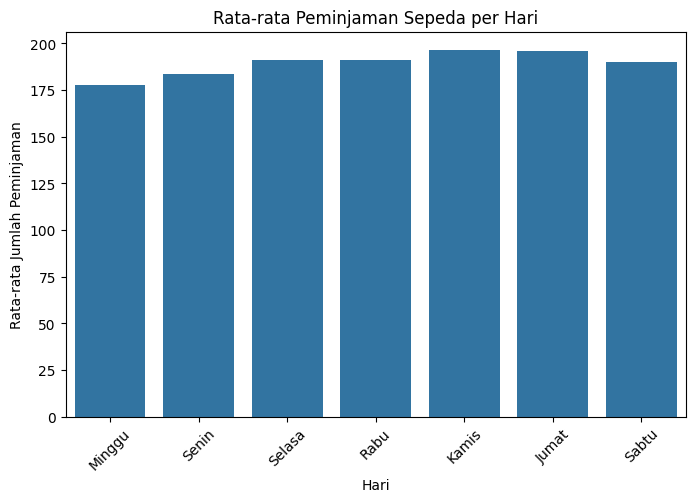

In [41]:
# Rata-rata peminjaman per hari
weekday_avg = df_day.groupby('weekday')['count'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=weekday_avg, x='weekday', y='count')
plt.title('Rata-rata Peminjaman Sepeda per Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()

**Insight**
- Rata-rata peminjaman sepeda tertinggi terjadi pada hari Kamis dan Jumat, sementara hari Minggu memiliki rata-rata peminjaman terendah.

- Hal ini menunjukkan bahwa penggunaan sepeda lebih intensif pada hari kerja, khususnya menjelang akhir pekan, yang mengindikasikan aktivitas mobilitas harian yang tinggi.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca (Berkabut, Cerah, Hujan Ringan) terhadap jumlah peminjaman sepeda pada tahun 2011-2012?

C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\1498488370.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_avg = df_day.groupby('weather')['count'].mean().reset_index()


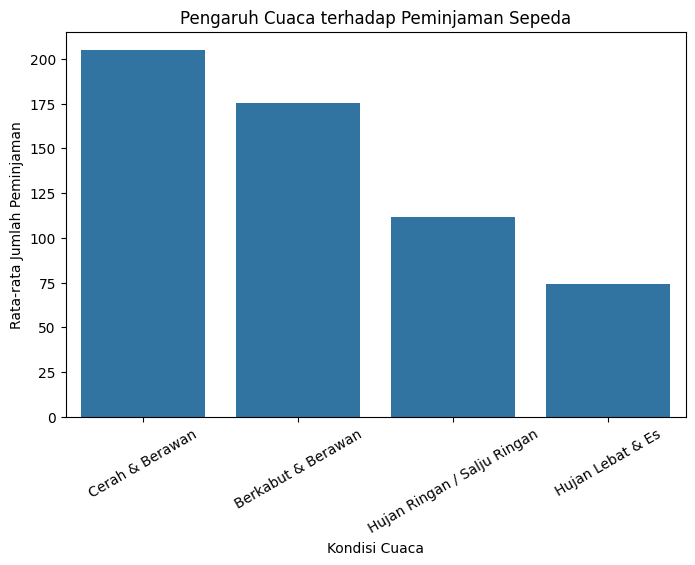

In [42]:
# Rata-rata peminjaman berdasarkan cuaca
weather_avg = df_day.groupby('weather')['count'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=weather_avg, x='weather', y='count')
plt.title('Pengaruh Cuaca terhadap Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=30)
plt.show()

**Insight**
- Kondisi Cerah & Berawan menghasilkan rata-rata peminjaman sepeda tertinggi.

- Ketika kondisi cuaca memburuk menjadi Berkabut & Berawan, jumlah peminjaman mengalami penurunan.

- Pada kondisi Hujan Ringan / Salju Ringan, peminjaman menurun secara signifikan.

- Temuan ini menunjukkan bahwa cuaca memiliki pengaruh kuat terhadap keputusan pengguna dalam menggunakan layanan sepeda.

### Pertannyaan 3 : Apakah terdapat perbedaan signifikan pada rata-rata jumlah peminjaman antara hari kerja (workingday) dan bukan hari kerja (holiday) selama 2011-2012?

C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\2544021800.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_avg = df_day.groupby('workingday')['count'].mean().reset_index()


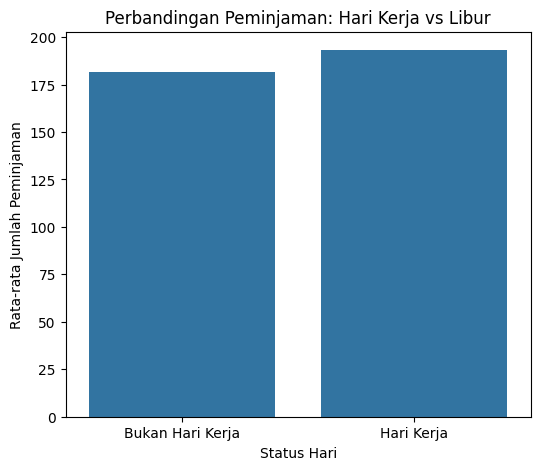

In [43]:
workingday_avg = df_day.groupby('workingday')['count'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=workingday_avg, x='workingday', y='count')
plt.title('Perbandingan Peminjaman: Hari Kerja vs Libur')
plt.xlabel('Status Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()


**Insight**
- Rata-rata peminjaman sepeda pada hari kerja lebih tinggi dibandingkan hari libur.

- Hal ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai sarana transportasi rutin dibandingkan sebagai sarana rekreasi.

### Pertanyaan 4 : Musim apa yang mencatat rata-rata peminjaman sepeda harian tertinggi sepanjang tahun 2011-2012?

C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\3563647775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df_day.groupby('season')['count'].mean().reset_index()


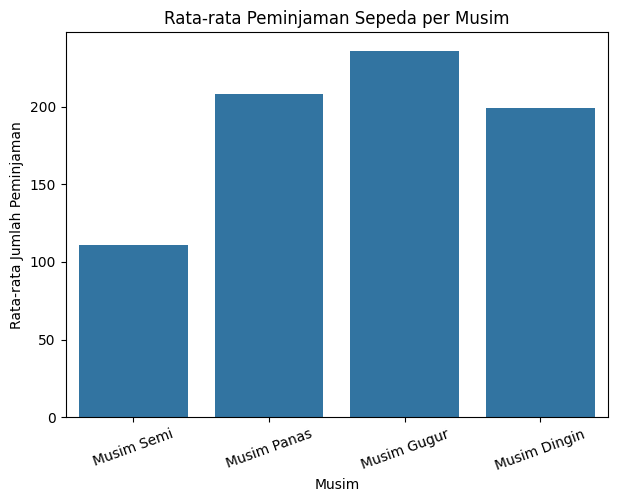

In [44]:
season_avg = df_day.groupby('season')['count'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=season_avg, x='season', y='count')
plt.title('Rata-rata Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=20)
plt.show()

**Insight**
- Musim Gugur menunjukkan rata-rata peminjaman sepeda tertinggi, diikuti oleh Musim Panas.

- Musim Semi memiliki rata-rata peminjaman terendah.

- Pola ini mengindikasikan bahwa kenyamanan kondisi musim berperan penting dalam meningkatkan penggunaan sepeda.

### Visualization & Explanatory Analysis Hour

### Pertanyaan 1 : Pada jam berapa saja peminjaman sepeda mencapai puncaknya (pola fluktuasi per jam) selama periode 2011-2012?

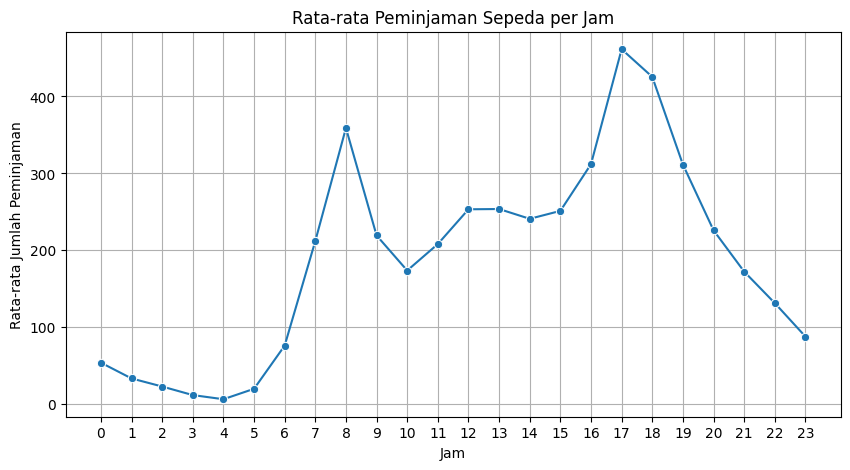

In [45]:
# Jam berapa peminjaman sepeda paling tinggi?
hour_avg = df_hour.groupby('hour')['count'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hour_avg, x='hour', y='count', marker='o')
plt.title('Rata-rata Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

**Insight**
- Terdapat dua puncak peminjaman utama, yaitu pada pukul 08.00 dan pukul 17.00–18.00.

- Pola ini menunjukkan bahwa sepeda banyak digunakan saat jam berangkat dan pulang kerja, memperkuat indikasi penggunaan sepeda sebagai alat transportasi komuter.

## Conclusion

1. **Kapan jumlah peminjaman sepeda paling tinggi berdasarkan hari dalam seminggu selama periode tahun 2011-2012?**

Jumlah peminjaman sepeda tertinggi terjadi pada hari Kamis dan Jumat, menunjukkan aktivitas peminjaman meningkat menjelang akhir pekan kerja.

2. **Bagaimana pengaruh kondisi cuaca (Berkabut, Cerah, Hujan Ringan) terhadap jumlah peminjaman sepeda pada tahun 2011-2012?**

Peminjaman sepeda paling tinggi saat cuaca cerah & berawan dan menurun drastis saat hujan, menandakan kondisi cuaca sangat memengaruhi keputusan pengguna untuk meminjam sepeda.

3. **Apakah terdapat perbedaan signifikan pada rata-rata jumlah peminjaman antara hari kerja (workingday) dan bukan hari kerja (holiday) selama 2011-2012?**

Terdapat perbedaan, di mana rata-rata peminjaman pada hari kerja lebih tinggi dibandingkan bukan hari kerja, mengindikasikan sepeda banyak digunakan untuk aktivitas rutin seperti bekerja atau sekolah.

4. **Musim apa yang mencatat rata-rata peminjaman sepeda harian tertinggi sepanjang tahun 2011-2012?**

Musim Gugur mencatat rata-rata peminjaman sepeda harian tertinggi, diikuti Musim Panas, sedangkan Musim Semi memiliki peminjaman terendah.

5. **Pada jam berapa saja peminjaman sepeda mencapai puncaknya (pola fluktuasi per jam) selama periode 2011-2012?**

Peminjaman sepeda mencapai puncak pada jam 08.00 pagi dan jam 17.00–18.00 sore, mencerminkan pola jam berangkat dan pulang kerja.

## Recommendation

- Perusahaan  dapat meningkatkan ketersediaan sepeda pada hari kerja, khususnya Kamis - Jumat serta pada jam sibuk (08.00 dan 17.00 - 18.00) guna mengantisipasi lonjakan permintaan.

- Pada kondisi cuaca buruk dan musim dengan peminjaman rendah, strategi seperti promo harga, perawatan armada, atau redistribusi sepeda dapat dilakukan untuk menjaga efisiensi operasional dan tingkat penggunaan.

In [90]:
# Simpan dataset hasil cleaning
df_day.to_csv('day_cleaned.csv', index=False)
df_hour.to_csv('hour_cleaned.csv', index=False)
